<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Проверка-расчёта-эффективности-обогащения" data-toc-modified-id="Проверка-расчёта-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчёта эффективности обогащения</a></span></li><li><span><a href="#Признаки,-отсутствующие-в-тестовой-выборке" data-toc-modified-id="Признаки,-отсутствующие-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки, отсутствующие в тестовой выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Изменение-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Изменение-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение суммарной концентрации всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

В данном проекте необходимо подготовить модель машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды для компании "Золото". Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. Использованы данные с параметрами добычи и очистки.

Предварительно необходимо провести анализ данных по следующему плану:
1. Изучить общую информацию об исходных данных.
2. Проверить, что эффективность обогащения рассчитана правильно.
3. Проанализировать признаки, отсутствующие в тестовой выборке.
4. Провести предобработку данных.
5. Посмотреть, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
6. Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках.
7. Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Подготовку модели необходимо провести по следующему плану:
1. Написать функцию для вычисления sMAPE.
2. Обучить разные модели и оцените их качество; выбрать лучшую модель и проверьте её на тестовой выборке.

После подготовки модели необходимо сделать общий вывод.

## Подготовка данных

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

Получим данные из файлов:

In [2]:
train_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv', sep=',')
test_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv', sep=',')
full_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv', sep=',')

### Предобработка данных

Посмотрим на общую информацию о данных:

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Типы данных в столбцах соответствуют содержимому.

В датасетах есть пропущенные значения, их можно заменить на медианные значения. Перед заменой пропущенных значений проверим, есть ли в датасетах выбивающиеся значения, а также дубликаты. Если такие значения есть, ряды с такими значениями необходимо удалить, т.к. их наличие может привести к ошибке при определении медианных значений. Оценим значения в датасетах:

In [6]:
train_data.describe()

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 14148.000000                 14148.000000   
mean                      5.142034                    10.132960   
std                       1.369586                     1.654930   
min                       0.000000                     0.000000   
25%                       4.211620                     9.297355   
50%                       4.994652                    10.297144   
75%                       5.859540                    11.170603   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  13938.000000                 14149.000000   
mean                       9.202849                    44.003792   
std                        2.790516                     4.905261   
min                        0.000000                     0.000000   
25%                        7.484645                    43.276111   
50%                        8.845462                    44.872436   
75%                       10.487508                    46.166425   
max                       18.124851                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           14149.000000          14149.000000          14049.000000   
mean               66.518832              9.607035              2.597298   
std                10.295402              2.319069              0.971843   
min                 0.000000              0.000000              0.000000   
25%                62.545817              7.997429              1.905973   
50%                67.432775              9.480270              2.592022   
75%                72.346428             11.003707              3.241723   
max               100.000000             19.552149              5.639565   

       final.output.tail_sol  final.output.tail_au  \
count           14144.000000          14149.000000   
mean               10.512122              2.918421   
std                 3.003617              0.903712   
min                 0.000000              0.000000   
25%                 8.811324              2.368607   
50%                10.514621              2.851025   
75%                11.933009              3.434764   
max                22.317730              8.197408   

       primary_cleaner.input.sulfate  ...  \
count                   14129.000000  ...   
mean                      133.320659  ...   
std                        39.431659  ...   
min                         0.003112  ...   
25%                       107.006651  ...   
50%                       133.018328  ...   
75%                       159.825396  ...   
max                       250.127834  ...   

       secondary_cleaner.state.floatbank4_a_air  \
count                              14143.000000   
mean                                  19.985454   
std                                    5.657723   
min                                    0.000000   
25%                                   14.990775   
50%                                   20.001789   
75%                                   24.990826   
max                                   30.115735   

       secondary_cleaner.state.floatbank4_a_level  \
count                                14148.000000   
mean                                  -478.696836   
std                                     50.736021   
min                                   -799.709069   
25%                                   -500.628656   
50%                                   -499.681450   
75%                                   -477.472413   
max                                   -245.239184   

       secondary_cleaner.state.floatbank4_b_air  \
count                              14148.000000   
mean                                  15.487065   
std                                    5.255655   
min                                    0.000000   
25%                

In [7]:
test_data.describe()

primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5286.000000                       5285.000000   
mean                      174.839652                          8.683596   
std                        43.027080                          3.072050   
min                         2.566156                          0.003839   
25%                       147.121401                          6.489555   
50%                       177.828489                          8.052207   
75%                       208.125438                         10.027764   
max                       265.983123                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5290.000000                     5286.000000   
mean                          7.266339                        1.383803   
std                           0.610219                        0.643474   
min                           5.650000                        0.004984   
25%                           6.890000                        0.907623   
50%                           7.250000                        1.197610   
75%                           7.600000                        1.797819   
max                          15.500000                        4.102454   

       primary_cleaner.state.floatbank8_a_air  \
count                            5.290000e+03   
mean                             1.539494e+03   
std                              1.167979e+02   
min                              5.445860e-32   
25%                              1.498936e+03   
50%                              1.585129e+03   
75%                              1.602077e+03   
max                              2.103104e+03   

       primary_cleaner.state.floatbank8_a_level  \
count                               5290.000000   
mean                                -497.665883   
std                                   19.952431   
min                                 -795.316337   
25%                                 -500.357298   
50%                                 -499.969164   
75%                                 -499.568951   
max                                  -57.195404   

       primary_cleaner.state.floatbank8_b_air  \
count                            5.290000e+03   
mean                             1.545174e+03   
std                              1.222246e+02   
min                              6.647490e-32   
25%                              1.498971e+03   
50%                              1.595622e+03   
75%                              1.602324e+03   
max                              1.813084e+03   

       primary_cleaner.state.floatbank8_b_level  \
count                               5290.000000   
mean                                -500.273098   
std                                   32.968307   
min                                 -799.997015   
25%                                 -500.703002   
50%                                 -500.028514   
75%                                 -499.293257   
max                                 -142.527229   

       primary_cleaner.state.floatbank8_c_air  \
count                            5.290000e+03   
mean                             1.527272e+03   
std                              1.225380e+02   
min                              4.033736e-32   
25%                              1.473230e+03   
50%                              1.549595e+03   
75%                              1.601144e+03   
max                              1.715054e+03   

       primary_cleaner.state.floatbank8_c_level  ...  \
count                               5290.000000  ...   
mean                                -498.330680  ...   
std                                   21.964876  ...   
min                                 -799.960571  ...   
25%                                 -501.018117  ...   
50%                                 -500.017711  ...   
75%                                

In [8]:
full_data.describe()

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 19438.000000                 19438.000000   
mean                      5.168470                     9.978895   
std                       1.372348                     1.669240   
min                       0.000000                     0.000000   
25%                       4.251240                     9.137262   
50%                       5.066094                    10.102433   
75%                       5.895527                    11.035769   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  19228.000000                 19439.000000   
mean                       9.501224                    44.076513   
std                        2.787537                     5.129784   
min                        0.000000                     0.000000   
25%                        7.722820                    43.402215   
50%                        9.218961                    45.011244   
75%                       10.947813                    46.275313   
max                       19.615720                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           19439.000000          19438.000000          19338.000000   
mean               67.050208              9.688589              2.705795   
std                10.125840              2.328642              0.949077   
min                 0.000000              0.000000              0.000000   
25%                63.299712              8.062878              2.040119   
50%                68.172738              9.743623              2.748730   
75%                72.686642             11.134294              3.333216   
max               100.000000             19.552149              5.804178   

       final.output.tail_sol  final.output.tail_au  \
count           19433.000000          19439.000000   
mean               10.583728              3.042467   
std                 2.868782              0.922808   
min                 0.000000              0.000000   
25%                 8.938947              2.461138   
50%                10.622456              2.984909   
75%                12.104271              3.571351   
max                22.317730              8.245022   

       primary_cleaner.input.sulfate  ...  \
count                   19415.000000  ...   
mean                      144.624774  ...   
std                        44.464071  ...   
min                         0.003112  ...   
25%                       114.107029  ...   
50%                       143.232103  ...   
75%                       175.075656  ...   
max                       265.983123  ...   

       secondary_cleaner.state.floatbank4_a_air  \
count                              19433.000000   
mean                                  18.987674   
std                                    5.411058   
min                                    0.000000   
25%                                   14.975734   
50%                                   18.017481   
75%                                   23.012470   
max                                   30.115735   

       secondary_cleaner.state.floatbank4_a_level  \
count                                19438.000000   
mean                                  -485.894516   
std                                     47.758570   
min                                   -799.798523   
25%                                   -500.704892   
50%                                   -499.837793   
75%                                   -498.249730   
max                                   -245.239184   

       secondary_cleaner.state.floatbank4_b_air  \
count                              19438.000000   
mean                                  15.010366   
std                                    4.890228   
min                                    0.000000   
25%                

 Рассматриваемые параметры технологического процесса по смыслу являются неотрицательными значениями. Бросается в глаза большое число отрицательных параметров, преобразуем их в положительные. Для этого напишем функцию (добавим в функцию логирование с помощью print для отслеживания выполнения, т.к. операция занимает много времени):

In [9]:
def transform_values_to_positive(data):
    for i in range(len(data)):
        print('Номер обрабатываемого ряда: ' + str(i + 1) + ' из ' + str(len(data)))
        for column in data.columns:
            if isinstance(data.loc[i, column], (int, float)):
                value = data.loc[i, column]
                if value < 0:
                    data.loc[i, column] = abs(value)

In [10]:
transform_values_to_positive(train_data)
transform_values_to_positive(test_data)
transform_values_to_positive(full_data)

Номер обрабатываемого ряда: 1 из 14149
Номер обрабатываемого ряда: 2 из 14149
Номер обрабатываемого ряда: 3 из 14149
Номер обрабатываемого ряда: 4 из 14149
Номер обрабатываемого ряда: 5 из 14149
Номер обрабатываемого ряда: 6 из 14149
Номер обрабатываемого ряда: 7 из 14149
Номер обрабатываемого ряда: 8 из 14149
Номер обрабатываемого ряда: 9 из 14149
Номер обрабатываемого ряда: 10 из 14149
Номер обрабатываемого ряда: 11 из 14149
Номер обрабатываемого ряда: 12 из 14149
Номер обрабатываемого ряда: 13 из 14149
Номер обрабатываемого ряда: 14 из 14149
Номер обрабатываемого ряда: 15 из 14149
Номер обрабатываемого ряда: 16 из 14149
Номер обрабатываемого ряда: 17 из 14149
Номер обрабатываемого ряда: 18 из 14149
Номер обрабатываемого ряда: 19 из 14149
Номер обрабатываемого ряда: 20 из 14149
Номер обрабатываемого ряда: 21 из 14149
Номер обрабатываемого ряда: 22 из 14149
Номер обрабатываемого ряда: 23 из 14149
Номер обрабатываемого ряда: 24 из 14149
Номер обрабатываемого ряда: 25 из 14149
Номер обр

Снова оценим значения в датасетах:

In [11]:
train_data.describe()

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 14148.000000                 14148.000000   
mean                      5.142034                    10.132960   
std                       1.369586                     1.654930   
min                       0.000000                     0.000000   
25%                       4.211620                     9.297355   
50%                       4.994652                    10.297144   
75%                       5.859540                    11.170603   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  13938.000000                 14149.000000   
mean                       9.202849                    44.003792   
std                        2.790516                     4.905261   
min                        0.000000                     0.000000   
25%                        7.484645                    43.276111   
50%                        8.845462                    44.872436   
75%                       10.487508                    46.166425   
max                       18.124851                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           14149.000000          14149.000000          14049.000000   
mean               66.518832              9.607035              2.597298   
std                10.295402              2.319069              0.971843   
min                 0.000000              0.000000              0.000000   
25%                62.545817              7.997429              1.905973   
50%                67.432775              9.480270              2.592022   
75%                72.346428             11.003707              3.241723   
max               100.000000             19.552149              5.639565   

       final.output.tail_sol  final.output.tail_au  \
count           14144.000000          14149.000000   
mean               10.512122              2.918421   
std                 3.003617              0.903712   
min                 0.000000              0.000000   
25%                 8.811324              2.368607   
50%                10.514621              2.851025   
75%                11.933009              3.434764   
max                22.317730              8.197408   

       primary_cleaner.input.sulfate  ...  \
count                   14129.000000  ...   
mean                      133.320659  ...   
std                        39.431659  ...   
min                         0.003112  ...   
25%                       107.006651  ...   
50%                       133.018328  ...   
75%                       159.825396  ...   
max                       250.127834  ...   

       secondary_cleaner.state.floatbank4_a_air  \
count                              14143.000000   
mean                                  19.985454   
std                                    5.657723   
min                                    0.000000   
25%                                   14.990775   
50%                                   20.001789   
75%                                   24.990826   
max                                   30.115735   

       secondary_cleaner.state.floatbank4_a_level  \
count                                14148.000000   
mean                                   478.696836   
std                                     50.736021   
min                                    245.239184   
25%                                    477.472413   
50%                                    499.681450   
75%                                    500.628656   
max                                    799.709069   

       secondary_cleaner.state.floatbank4_b_air  \
count                              14148.000000   
mean                                  15.487065   
std                                    5.255655   
min                                    0.000000   
25%                

In [12]:
test_data.describe()

primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5286.000000                       5285.000000   
mean                      174.839652                          8.683596   
std                        43.027080                          3.072050   
min                         2.566156                          0.003839   
25%                       147.121401                          6.489555   
50%                       177.828489                          8.052207   
75%                       208.125438                         10.027764   
max                       265.983123                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5290.000000                     5286.000000   
mean                          7.266339                        1.383803   
std                           0.610219                        0.643474   
min                           5.650000                        0.004984   
25%                           6.890000                        0.907623   
50%                           7.250000                        1.197610   
75%                           7.600000                        1.797819   
max                          15.500000                        4.102454   

       primary_cleaner.state.floatbank8_a_air  \
count                            5.290000e+03   
mean                             1.539494e+03   
std                              1.167979e+02   
min                              5.445860e-32   
25%                              1.498936e+03   
50%                              1.585129e+03   
75%                              1.602077e+03   
max                              2.103104e+03   

       primary_cleaner.state.floatbank8_a_level  \
count                               5290.000000   
mean                                 497.665883   
std                                   19.952431   
min                                   57.195404   
25%                                  499.568951   
50%                                  499.969164   
75%                                  500.357298   
max                                  795.316337   

       primary_cleaner.state.floatbank8_b_air  \
count                            5.290000e+03   
mean                             1.545174e+03   
std                              1.222246e+02   
min                              6.647490e-32   
25%                              1.498971e+03   
50%                              1.595622e+03   
75%                              1.602324e+03   
max                              1.813084e+03   

       primary_cleaner.state.floatbank8_b_level  \
count                               5290.000000   
mean                                 500.273098   
std                                   32.968307   
min                                  142.527229   
25%                                  499.293257   
50%                                  500.028514   
75%                                  500.703002   
max                                  799.997015   

       primary_cleaner.state.floatbank8_c_air  \
count                            5.290000e+03   
mean                             1.527272e+03   
std                              1.225380e+02   
min                              4.033736e-32   
25%                              1.473230e+03   
50%                              1.549595e+03   
75%                              1.601144e+03   
max                              1.715054e+03   

       primary_cleaner.state.floatbank8_c_level  ...  \
count                               5290.000000  ...   
mean                                 498.330680  ...   
std                                   21.964876  ...   
min                                  150.937035  ...   
25%                                  498.994130  ...   
50%                                  500.017711  ...   
75%                                

In [13]:
full_data.describe()

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 19438.000000                 19438.000000   
mean                      5.168470                     9.978895   
std                       1.372348                     1.669240   
min                       0.000000                     0.000000   
25%                       4.251240                     9.137262   
50%                       5.066094                    10.102433   
75%                       5.895527                    11.035769   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  19228.000000                 19439.000000   
mean                       9.501224                    44.076513   
std                        2.787537                     5.129784   
min                        0.000000                     0.000000   
25%                        7.722820                    43.402215   
50%                        9.218961                    45.011244   
75%                       10.947813                    46.275313   
max                       19.615720                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           19439.000000          19438.000000          19338.000000   
mean               67.050208              9.688589              2.705795   
std                10.125840              2.328642              0.949077   
min                 0.000000              0.000000              0.000000   
25%                63.299712              8.062878              2.040119   
50%                68.172738              9.743623              2.748730   
75%                72.686642             11.134294              3.333216   
max               100.000000             19.552149              5.804178   

       final.output.tail_sol  final.output.tail_au  \
count           19433.000000          19439.000000   
mean               10.583728              3.042467   
std                 2.868782              0.922808   
min                 0.000000              0.000000   
25%                 8.938947              2.461138   
50%                10.622456              2.984909   
75%                12.104271              3.571351   
max                22.317730              8.245022   

       primary_cleaner.input.sulfate  ...  \
count                   19415.000000  ...   
mean                      144.624774  ...   
std                        44.464071  ...   
min                         0.003112  ...   
25%                       114.107029  ...   
50%                       143.232103  ...   
75%                       175.075656  ...   
max                       265.983123  ...   

       secondary_cleaner.state.floatbank4_a_air  \
count                              19433.000000   
mean                                  18.987674   
std                                    5.411058   
min                                    0.000000   
25%                                   14.975734   
50%                                   18.017481   
75%                                   23.012470   
max                                   30.115735   

       secondary_cleaner.state.floatbank4_a_level  \
count                                19438.000000   
mean                                   485.894516   
std                                     47.758570   
min                                    245.239184   
25%                                    498.249730   
50%                                    499.837793   
75%                                    500.704892   
max                                    799.798523   

       secondary_cleaner.state.floatbank4_b_air  \
count                              19438.000000   
mean                                  15.010366   
std                                    4.890228   
min                                    0.000000   
25%                

Сейчас характеристики значений выглядят правдоподобно.

Проверим, есть ли в датасетах дубликаты:

In [14]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())
print(full_data.duplicated().sum())

0
0
0


Полных дубликатов нет. Проверим, есть ли повторяющиеся значения в столбцах `date`:

In [15]:
train_data['date'].value_counts(dropna=False).sort_values(ascending=False)

2017-07-01 05:59:59    1
2016-02-15 13:00:00    1
2017-07-03 03:59:59    1
2017-04-23 01:59:59    1
2017-02-28 23:59:59    1
                      ..
2018-02-18 14:59:59    1
2016-08-05 13:59:59    1
2017-01-27 03:59:59    1
2018-01-22 09:59:59    1
2017-01-10 02:59:59    1
Name: date, Length: 14149, dtype: int64

In [16]:
test_data['date'].value_counts(dropna=False).sort_values(ascending=False)

2017-12-29 18:59:59    1
2017-11-12 21:59:59    1
2016-10-27 08:59:59    1
2016-10-13 18:59:59    1
2016-10-11 00:59:59    1
                      ..
2017-10-25 15:59:59    1
2016-12-19 02:59:59    1
2016-10-10 22:59:59    1
2016-12-30 03:59:59    1
2016-10-23 18:59:59    1
Name: date, Length: 5290, dtype: int64

In [17]:
full_data['date'].value_counts(dropna=False).sort_values(ascending=False)

2017-07-01 05:59:59    1
2018-01-17 02:59:59    1
2017-04-23 01:59:59    1
2016-06-13 20:59:59    1
2016-06-11 09:59:59    1
                      ..
2016-04-12 06:00:00    1
2018-05-18 07:59:59    1
2017-09-07 19:59:59    1
2017-01-10 02:59:59    1
2016-10-23 18:59:59    1
Name: date, Length: 19439, dtype: int64

Значения в столбцах `date` являются уникальными.

Сейчас можно заменить пропущенные значения на медианные. Для этого напишем функцию:

In [18]:
def fill_nan_values_with_median_values(data):
    nan_values_number = data.isna().sum()
    columns_with_nan_values = nan_values_number[nan_values_number > 0].index
    for column in columns_with_nan_values:
        data.loc[data[column].isna(), column] = data[column].median()

In [19]:
fill_nan_values_with_median_values(train_data)
fill_nan_values_with_median_values(test_data)
fill_nan_values_with_median_values(full_data)

Проверим, что во входных данных не осталось пропусков:

In [20]:
train_data.isna().sum().sort_values(ascending=False)

date                                          0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
                                             ..
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_b_air        0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [21]:
test_data.isna().sum().sort_values(ascending=False)

date                                          0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_a_level    0
secondary_cleaner.state.floatbank3_b_air      0
secondary_cleaner.state.floatbank3_b_level    0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_b_air      0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank5_a_air

In [22]:
full_data.isna().sum().sort_values(ascending=False)

date                                          0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
                                             ..
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_b_air        0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Посмотрим на первые 10 строк датасетов:

In [23]:
train_data.head(10)

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   
5  2016-01-15 05:00:00                     6.482968   
6  2016-01-15 06:00:00                     6.533849   
7  2016-01-15 07:00:00                     6.130823   
8  2016-01-15 08:00:00                     5.834140   
9  2016-01-15 09:00:00                     5.687063   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   
5                    10.049416                      5.480257   
6                    10.058141                      4.569100   
7                     9.935481                      4.389813   
8                    10.071156                      4.876389   
9                     9.980404                      5.282514   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   
5                    41.633678              69.465816             10.182708   
6                    41.995316              69.300835             10.304598   
7                    42.452727              70.230976             10.443288   
8                    43.404078              69.688595             10.420140   
9                    43.235220              70.279619             10.487013   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   
5              0.664118              16.999638              1.918586  ...   
6              0.807342              16.723575              2.058913  ...   
7              0.949346              16.689959              2.143437  ...   
8              1.065453              17.201948              2.209881  ...   
9              1.159805              17.483979              2.209593  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   
5                                 13.938497   
6                                 14.046819   
7                                 13.974691   
8                                 13.964030   
9                                 13.989632   

   secondary_cleaner.state.floatbank4_a_level  \
0                                  502.488007   
1                                  505.503262   
2                                  502.520901   
3                                  500.857308   
4                                  499.838632   
5                                  500.970168   
6                                  500.971133   
7                                  501.819696   
8                             

In [24]:
test_data.head(10)

date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   
5  2016-09-01 05:59:59                     168.485085   
6  2016-09-01 06:59:59                     144.133440   
7  2016-09-01 07:59:59                     133.513396   
8  2016-09-01 08:59:59                     133.735356   
9  2016-09-01 09:59:59                     126.961069   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   
5                          8.817007                         7.420000   
6                          7.924610                         7.420000   
7                          8.055252                         6.988000   
8                          7.999618                         6.935000   
9                          8.017856                         7.030000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   
5                        0.791191                             1402.826803   
6                        0.788838                             1398.252401   
7                        0.801871                             1401.669677   
8                        0.789329                             1402.358981   
9                        0.805298                             1400.816120   

   primary_cleaner.state.floatbank8_a_level  \
0                                500.225577   
1                                500.057435   
2                                500.868360   
3                                498.863574   
4                                500.808305   
5                                499.299521   
6                                499.748672   
7                                501.777839   
8                                499.981597   
9                                499.014158   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   
5                             1401.511119   
6                             1393.255503   
7                             1400.754446   
8                             1400.985954   
9                             1399.975401   

   primary_cleaner.state.floatbank8_b_level  \
0                                499.919735   
1                                499.778182   
2                                499.764529   
3                                499.211024   
4                                499.504543   
5                                499.205357   
6                                499.195380   
7                                502.514024   
8                                496.802968   
9                                499.570552   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   
2                             1398.075709  ...   
3                

In [25]:
full_data.head(10)

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   
5  2016-01-15 05:00:00                     6.482968   
6  2016-01-15 06:00:00                     6.533849   
7  2016-01-15 07:00:00                     6.130823   
8  2016-01-15 08:00:00                     5.834140   
9  2016-01-15 09:00:00                     5.687063   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   
5                    10.049416                      5.480257   
6                    10.058141                      4.569100   
7                     9.935481                      4.389813   
8                    10.071156                      4.876389   
9                     9.980404                      5.282514   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   
5                    41.633678              69.465816             10.182708   
6                    41.995316              69.300835             10.304598   
7                    42.452727              70.230976             10.443288   
8                    43.404078              69.688595             10.420140   
9                    43.235220              70.279619             10.487013   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   
5              0.664118              16.999638              1.918586  ...   
6              0.807342              16.723575              2.058913  ...   
7              0.949346              16.689959              2.143437  ...   
8              1.065453              17.201948              2.209881  ...   
9              1.159805              17.483979              2.209593  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   
5                                 13.938497   
6                                 14.046819   
7                                 13.974691   
8                                 13.964030   
9                                 13.989632   

   secondary_cleaner.state.floatbank4_a_level  \
0                                  502.488007   
1                                  505.503262   
2                                  502.520901   
3                                  500.857308   
4                                  499.838632   
5                                  500.970168   
6                                  500.971133   
7                                  501.819696   
8                             

Данные готовы для дальнейшего анализа.

### Проверка расчёта эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery:

In [26]:
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

rougher_calculation_recovery = C * (F - T) / (F * (C - T)) * 100

Найдём MAE между расчётом и значением признака:

In [27]:
mean_absolute_error(train_data['rougher.output.recovery'], rougher_calculation_recovery)

9.73512347450521e-15

Крайне малое значение MAE говорит о том, что эффективность обогащения рассчитана правильно.

### Признаки, отсутствующие в тестовой выборке

Найдём признаки, отсутствующие в тестовой выборке, но присутствующие в обучающей выборке:

In [28]:
missing_test_data_columns = []

for column in train_data.columns:
    if column not in test_data.columns:
        missing_test_data_columns.append(column)

missing_test_data_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Данные параметры выражены дробными числами.

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрим, как изменяются во времени значения интересующих нас параметров.

Изменения во времени параметров группы rougher.input.feed:

<AxesSubplot:xlabel='Номер измерения', ylabel='rougher.input.feed_au'>

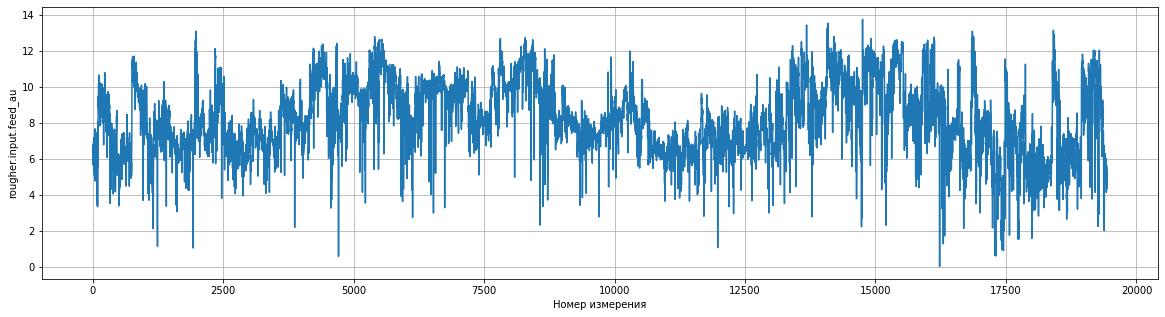

In [29]:
full_data['rougher.input.feed_au'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='rougher.input.feed_au')

<AxesSubplot:xlabel='Номер измерения', ylabel='rougher.input.feed_ag'>

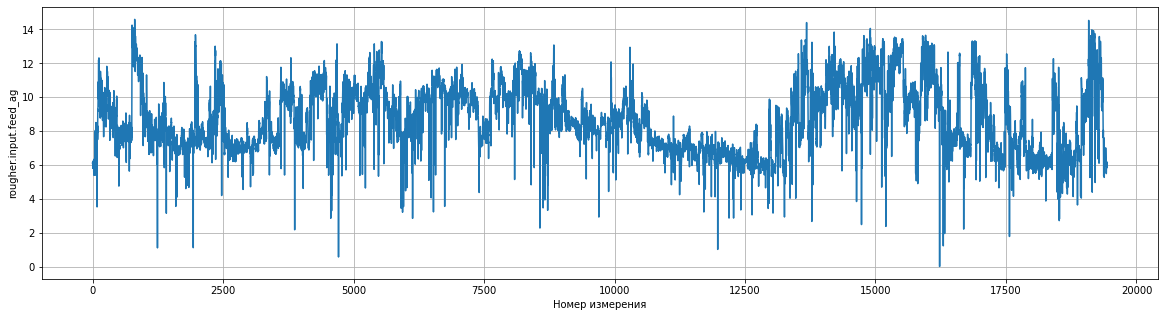

In [30]:
full_data['rougher.input.feed_ag'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='rougher.input.feed_ag')

<AxesSubplot:xlabel='Номер измерения', ylabel='rougher.input.feed_pb'>

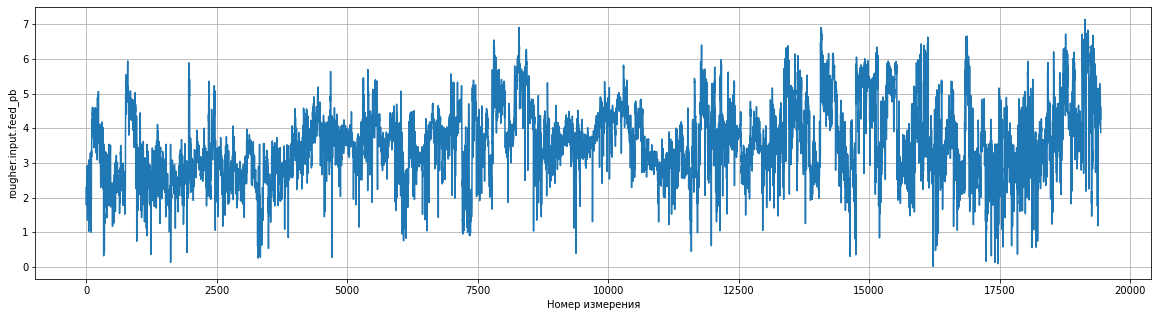

In [31]:
full_data['rougher.input.feed_pb'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='rougher.input.feed_pb')

Изменения во времени параметров группы rougher.output.concentrate:

<AxesSubplot:xlabel='Номер измерения', ylabel='rougher.output.concentrate_au'>

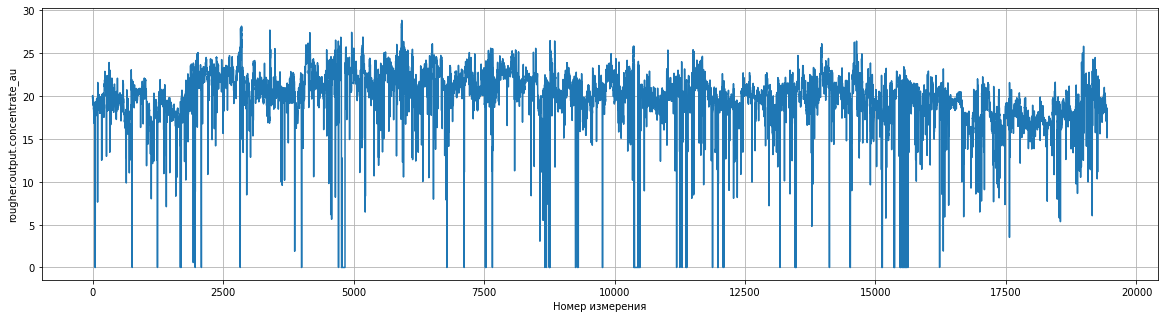

In [32]:
full_data['rougher.output.concentrate_au'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='rougher.output.concentrate_au')

<AxesSubplot:xlabel='Номер измерения', ylabel='rougher.output.concentrate_ag'>

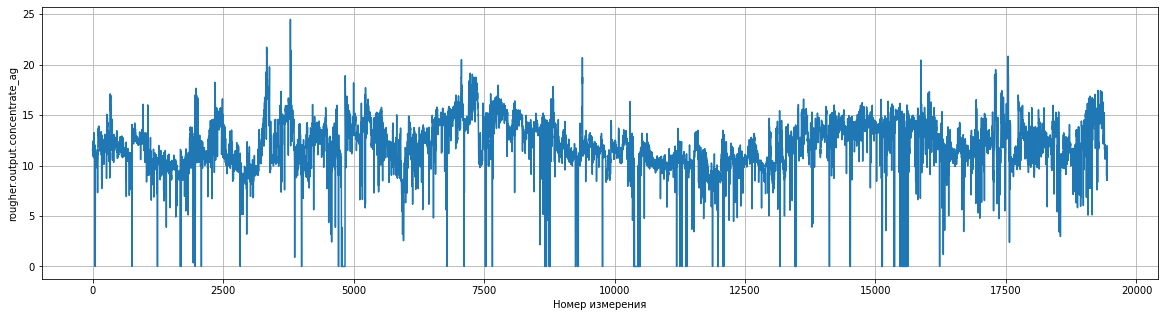

In [33]:
full_data['rougher.output.concentrate_ag'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='rougher.output.concentrate_ag')

<AxesSubplot:xlabel='Номер измерения', ylabel='rougher.output.concentrate_pb'>

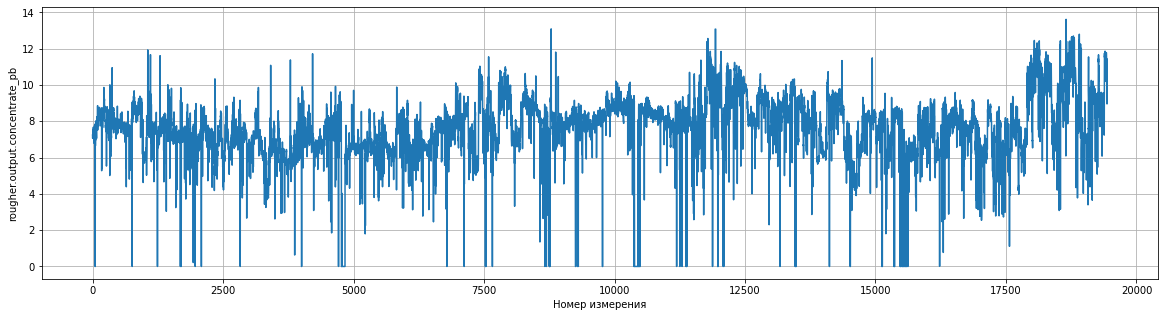

In [34]:
full_data['rougher.output.concentrate_pb'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='rougher.output.concentrate_pb')

Изменения во времени параметров группы primary_cleaner.output.concentrate:

<AxesSubplot:xlabel='Номер измерения', ylabel='primary_cleaner.output.concentrate_au'>

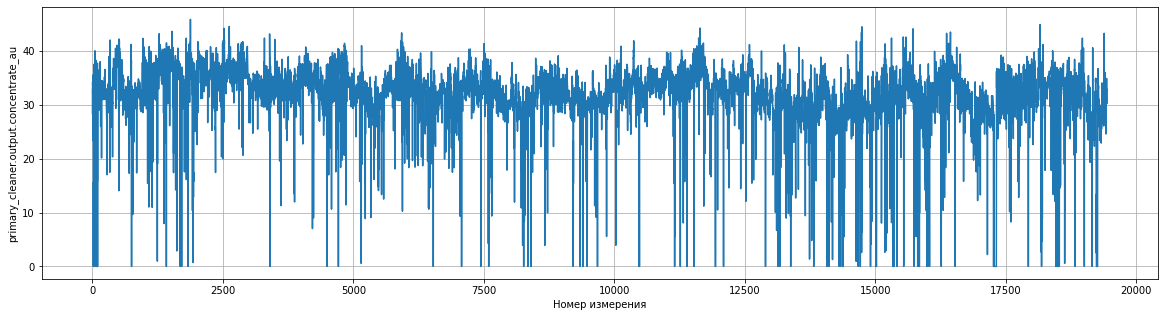

In [35]:
full_data['primary_cleaner.output.concentrate_au'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='primary_cleaner.output.concentrate_au')

<AxesSubplot:xlabel='Номер измерения', ylabel='primary_cleaner.output.concentrate_ag'>

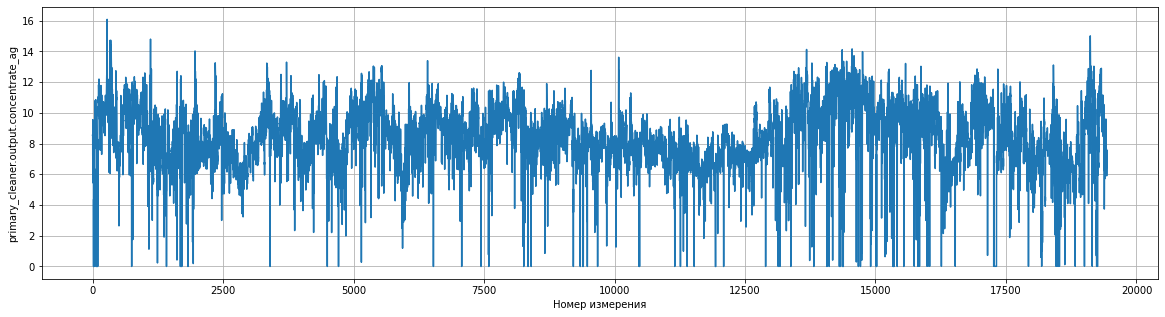

In [36]:
full_data['primary_cleaner.output.concentrate_ag'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='primary_cleaner.output.concentrate_ag')

<AxesSubplot:xlabel='Номер измерения', ylabel='primary_cleaner.output.concentrate_pb'>

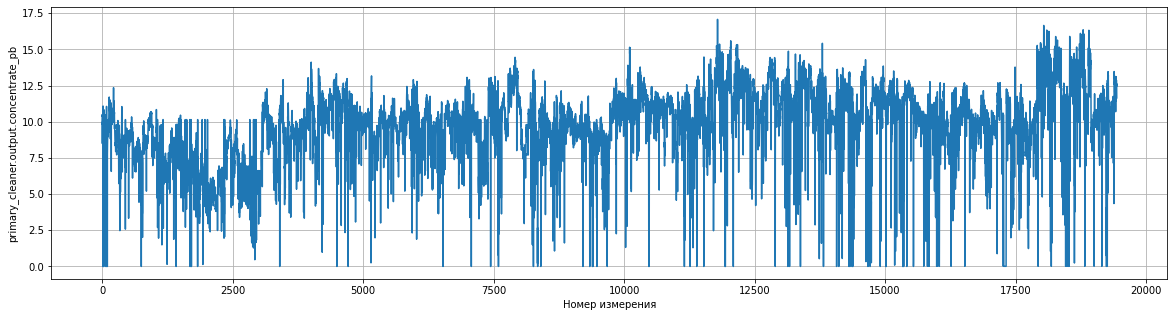

In [37]:
full_data['primary_cleaner.output.concentrate_pb'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='primary_cleaner.output.concentrate_pb')

Изменения во времени параметров группы final.output.concentrate:

<AxesSubplot:xlabel='Номер измерения', ylabel='final.output.concentrate_au'>

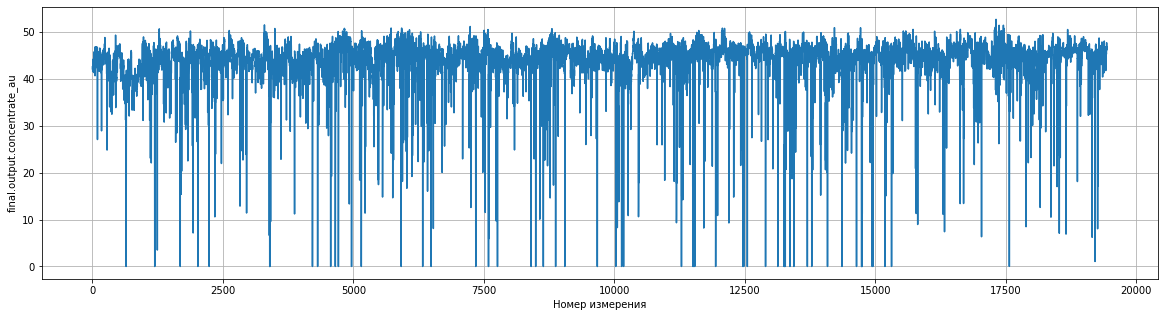

In [38]:
full_data['final.output.concentrate_au'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='final.output.concentrate_au')

<AxesSubplot:xlabel='Номер измерения', ylabel='final.output.concentrate_ag'>

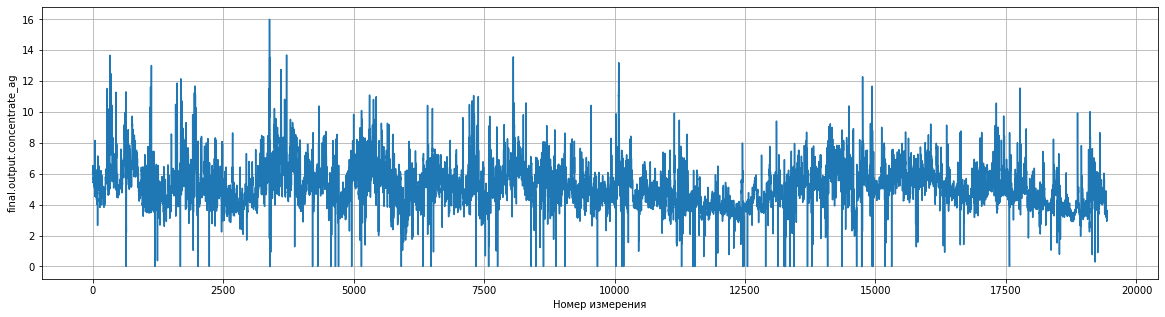

In [39]:
full_data['final.output.concentrate_ag'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='final.output.concentrate_ag')

<AxesSubplot:xlabel='Номер измерения', ylabel='final.output.concentrate_pb'>

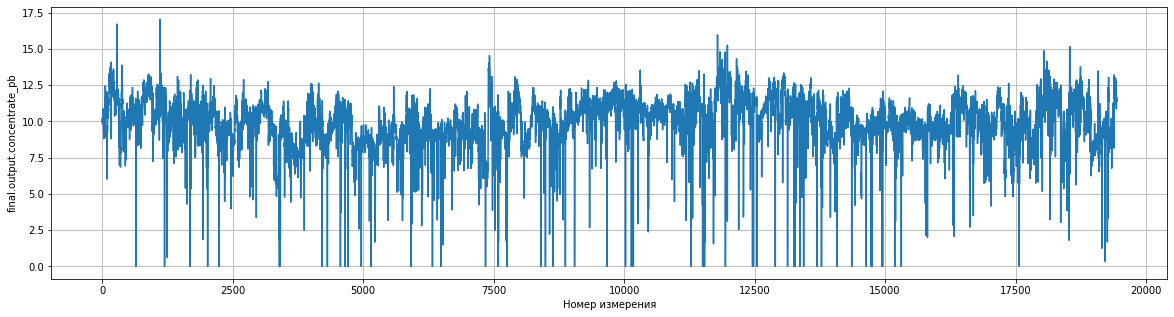

In [40]:
full_data['final.output.concentrate_pb'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='final.output.concentrate_pb')

Для оценки того, как меняется концентрация металлов на различных этапах очистки, используем медианные значения:

<AxesSubplot:>

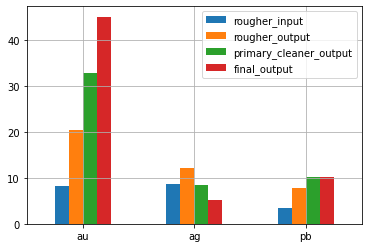

In [41]:
rougher_input_feed_au_median = full_data['rougher.input.feed_au'].median()
rougher_input_feed_ag_median = full_data['rougher.input.feed_ag'].median()
rougher_input_feed_pb_median = full_data['rougher.input.feed_pb'].median()

rougher_output_concentrate_au_median = full_data['rougher.output.concentrate_au'].median()
rougher_output_concentrate_ag_median = full_data['rougher.output.concentrate_ag'].median()
rougher_output_concentrate_pb_median = full_data['rougher.output.concentrate_pb'].median()

primary_cleaner_output_concentrate_au_median = full_data['primary_cleaner.output.concentrate_au'].median()
primary_cleaner_output_concentrate_ag_median = full_data['primary_cleaner.output.concentrate_ag'].median()
primary_cleaner_output_concentrate_pb_median = full_data['primary_cleaner.output.concentrate_pb'].median()

final_output_concentrate_au_median = full_data['final.output.concentrate_au'].median()
final_output_concentrate_ag_median = full_data['final.output.concentrate_ag'].median()
final_output_concentrate_pb_median = full_data['final.output.concentrate_pb'].median()

rougher_input_feed_median = [rougher_input_feed_au_median, rougher_input_feed_ag_median, rougher_input_feed_pb_median]
rougher_output_concentrate_median = [rougher_output_concentrate_au_median, rougher_output_concentrate_ag_median, rougher_output_concentrate_pb_median]
primary_cleaner_output_concentrate_median = [primary_cleaner_output_concentrate_au_median, primary_cleaner_output_concentrate_ag_median, primary_cleaner_output_concentrate_pb_median]
final_output_concentrate_median = [final_output_concentrate_au_median, final_output_concentrate_ag_median, final_output_concentrate_pb_median]
index = ['au', 'ag', 'pb']
df = pd.DataFrame({'rougher_input': rougher_input_feed_median,
                   'rougher_output': rougher_output_concentrate_median,
                   'primary_cleaner_output': primary_cleaner_output_concentrate_median,
                   'final_output': final_output_concentrate_median}, index=index)
df.plot.bar(rot=0, grid=True)

Концентрация золота ближе к концу технологического процесса растёт, а концентрация серебра уменьшается, что естественно. Наблюдается незначительное увеличение концентрации свинца, что может быть связано с особенностями технологического процесса.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Построим гистрограмму распределения значений параметра `rougher.input.feed_size` обучающей выборки:

<AxesSubplot:>

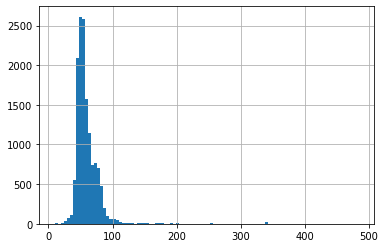

In [42]:
column = 'rougher.input.feed_size'
train_data[column].hist(bins=100)

Выделим интересующий нас диапазон:

<AxesSubplot:>

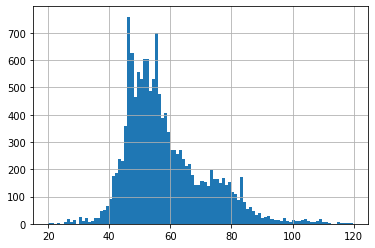

In [43]:
rougher_input_feed_size_train_sample = train_data[(train_data[column] > 20) & (train_data[column] < 120)][column]
rougher_input_feed_size_train_sample.hist(bins=100)

Построим гистрограмму распределения значений параметра rougher.input.feed_size тестовой выборки:

<AxesSubplot:>

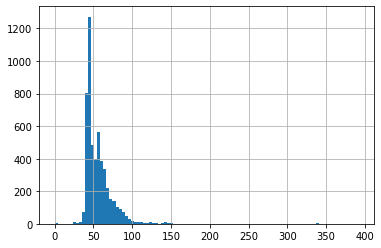

In [44]:
column = 'rougher.input.feed_size'
test_data[column].hist(bins=100)

Выделим интересующий нас диапазон:

<AxesSubplot:>

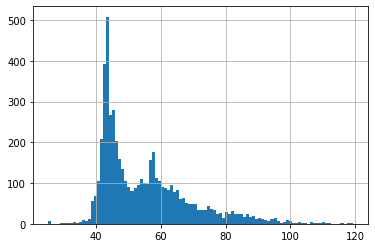

In [45]:
rougher_input_feed_size_test_sample = test_data[(test_data[column] > 20) & (test_data[column] < 120)][column]
rougher_input_feed_size_test_sample.hist(bins=100)

Построим нормализованные гистограммы на одном графике:

<AxesSubplot:ylabel='Density'>

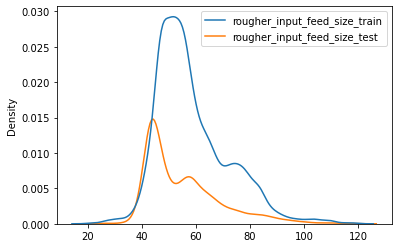

In [46]:
samples = pd.DataFrame({'rougher_input_feed_size_train': rougher_input_feed_size_train_sample,
                        'rougher_input_feed_size_test': rougher_input_feed_size_test_sample})

sns.kdeplot(data=samples)

Распределения параметра `rougher.input.feed_size` обучающей и тестовой выборок близки друг к другу.

Построим гистрограмму распределения значений параметра `primary_cleaner.input.feed_size` обучающей выборки:

<AxesSubplot:>

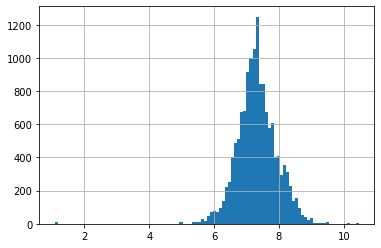

In [47]:
column = 'primary_cleaner.input.feed_size'
train_data[column].hist(bins=100)

Выделим интересующий нас диапазон:

<AxesSubplot:>

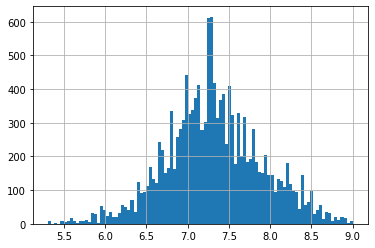

In [48]:
primary_cleaner_input_feed_size_train_sample = train_data[(train_data[column] > 5) & (train_data[column] < 9)][column]
primary_cleaner_input_feed_size_train_sample.hist(bins=100)

Построим гистрограмму распределения значений параметра primary_cleaner.input.feed_size тестовой выборки:

<AxesSubplot:>

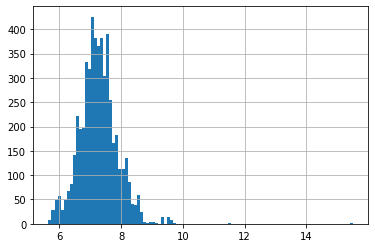

In [49]:
column = 'primary_cleaner.input.feed_size'
test_data[column].hist(bins=100)

Выделим интересующий нас диапазон:

<AxesSubplot:>

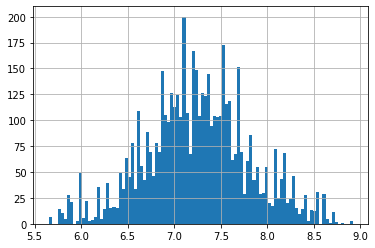

In [50]:
primary_cleaner_input_feed_size_test_sample = test_data[(test_data[column] > 5) & (test_data[column] < 9)][column]
primary_cleaner_input_feed_size_test_sample.hist(bins=100)

Построим нормализованные гистограммы на одном графике:

<AxesSubplot:ylabel='Density'>

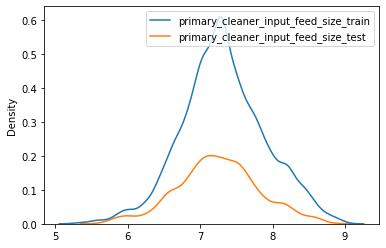

In [51]:
samples = pd.DataFrame({'primary_cleaner_input_feed_size_train': primary_cleaner_input_feed_size_train_sample,
                        'primary_cleaner_input_feed_size_test': primary_cleaner_input_feed_size_test_sample})

sns.kdeplot(data=samples)

Распределения параметра `primary_cleaner.input.feed_size` обучающей и тестовой выборок близки друг к другу.

Таким образом распределения размеров гранул сырья на обучающей и тестовой выборках примерно одинаковы.

### Изменение суммарной концентрации всех веществ на разных стадиях

Рассчитаем суммарную концентрацию всех веществ на разных стадиях:

In [52]:
full_data['rougher.input.feed_sum'] = full_data['rougher.input.feed_au'] + full_data['rougher.input.feed_ag'] + full_data['rougher.input.feed_pb'] + full_data['rougher.input.feed_sol']
full_data['rougher.output.concentrate_sum'] = full_data['rougher.output.concentrate_au'] + full_data['rougher.output.concentrate_ag'] + full_data['rougher.output.concentrate_pb'] + full_data['rougher.output.concentrate_sol']
full_data['primary_cleaner.output.concentrate_sum'] = full_data['primary_cleaner.output.concentrate_au'] + full_data['primary_cleaner.output.concentrate_ag'] + full_data['primary_cleaner.output.concentrate_pb'] + full_data['primary_cleaner.output.concentrate_sol']
full_data['final.output.concentrate_sum'] = full_data['final.output.concentrate_au'] + full_data['final.output.concentrate_ag'] + full_data['final.output.concentrate_pb'] + full_data['final.output.concentrate_sol']

Посмотрим, как меняется суммарная концентрация во времени на разных стадиях:

<AxesSubplot:xlabel='Номер измерения', ylabel='rougher.input.feed_sum'>

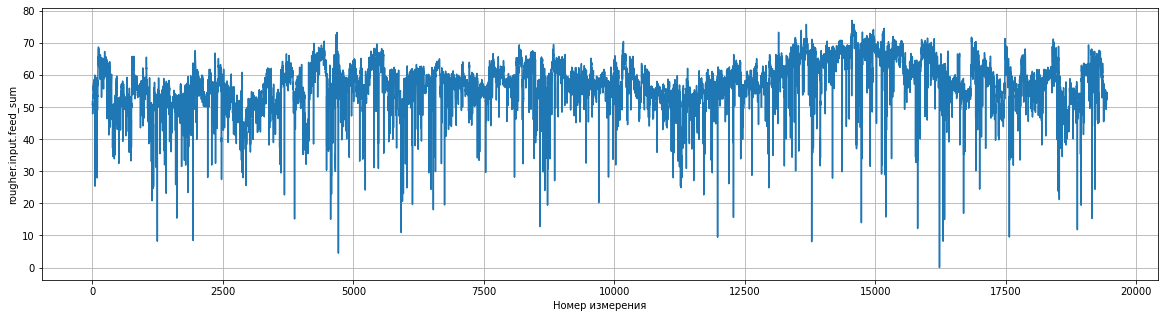

In [53]:
full_data['rougher.input.feed_sum'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='rougher.input.feed_sum')

<AxesSubplot:xlabel='Номер измерения', ylabel='rougher.output.concentrate_sum'>

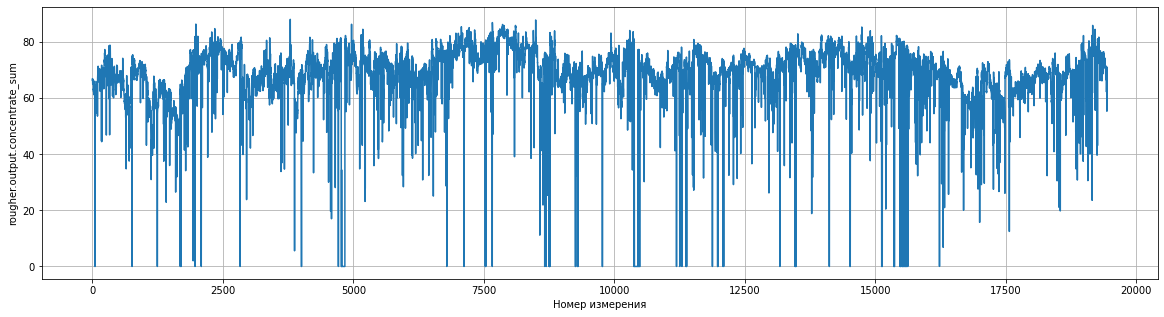

In [54]:
full_data['rougher.output.concentrate_sum'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='rougher.output.concentrate_sum')

<AxesSubplot:xlabel='Номер измерения', ylabel='primary_cleaner.output.concentrate_sum'>

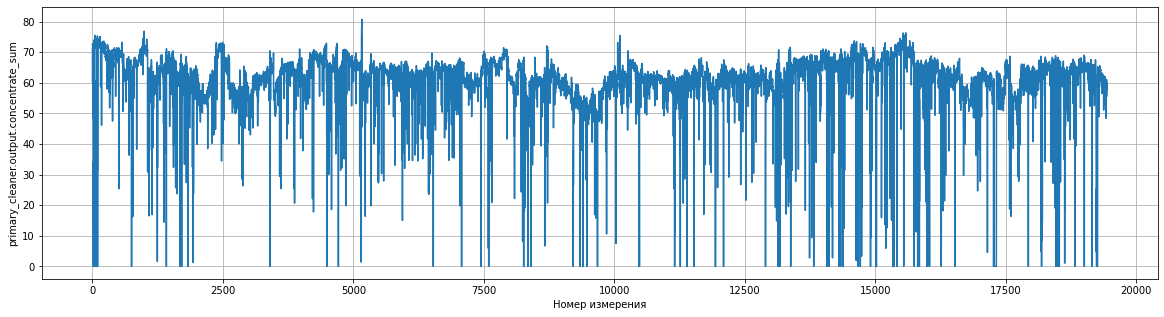

In [55]:
full_data['primary_cleaner.output.concentrate_sum'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='primary_cleaner.output.concentrate_sum')

<AxesSubplot:xlabel='Номер измерения', ylabel='final.output.concentrate_sum'>

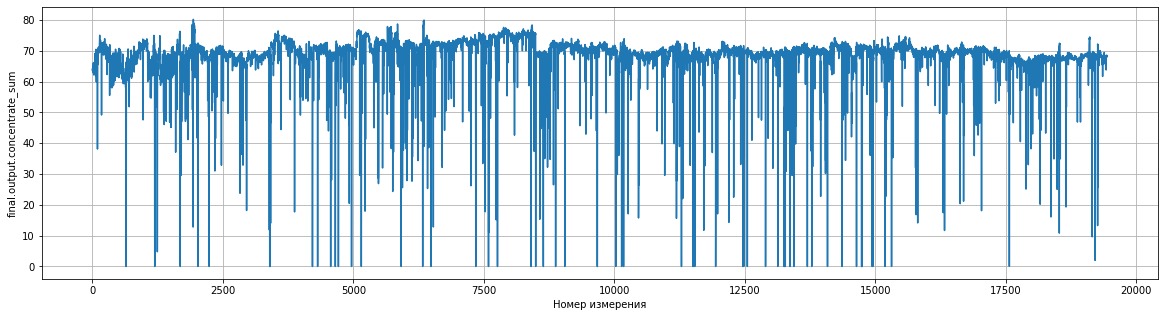

In [56]:
full_data['final.output.concentrate_sum'].plot(figsize=(20, 5), grid=True, xlabel='Номер измерения', ylabel='final.output.concentrate_sum')

<AxesSubplot:xlabel='rougher.input.feed_sum', ylabel='Count'>

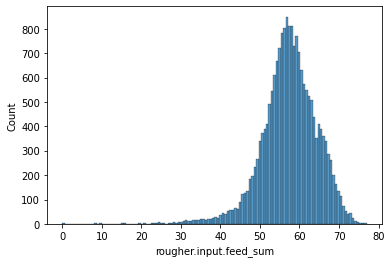

In [57]:
sns.histplot(data=full_data['rougher.input.feed_sum'])

<AxesSubplot:xlabel='rougher.output.concentrate_sum', ylabel='Count'>

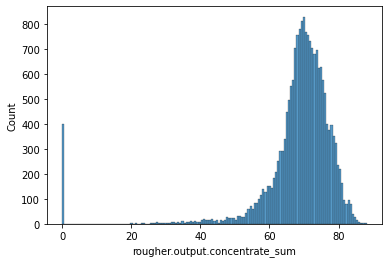

In [58]:
sns.histplot(data=full_data['rougher.output.concentrate_sum'])

<AxesSubplot:xlabel='primary_cleaner.output.concentrate_sum', ylabel='Count'>

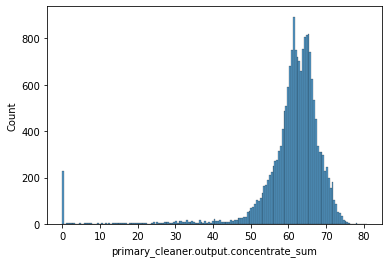

In [59]:
sns.histplot(data=full_data['primary_cleaner.output.concentrate_sum'])

<AxesSubplot:xlabel='final.output.concentrate_sum', ylabel='Count'>

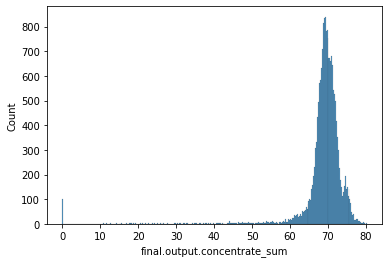

In [60]:
sns.histplot(data=full_data['final.output.concentrate_sum'])

На некоторых графиках видны пики, соответствующие нулевым значениям.

Удалим нулевые значения по приведенным выше рекомендациям:

In [61]:
for col in ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum']:
    full_data = full_data[full_data[col]>0]

Для оценки суммарной концентрации используем медианные значения:

<AxesSubplot:>

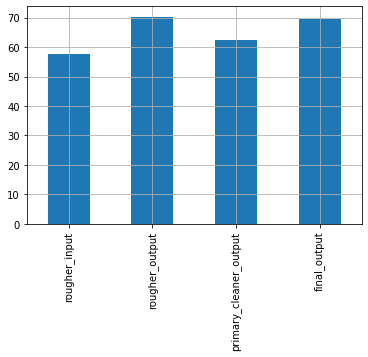

In [62]:
rougher_input_feed_sum_median = full_data['rougher.input.feed_sum'].median()
rougher_output_concentrate_sum_median = full_data['rougher.output.concentrate_sum'].median()
primary_cleaner_output_concentrate_sum_median = full_data['primary_cleaner.output.concentrate_sum'].median()
final_output_concentrate_sum_median = full_data['final.output.concentrate_sum'].median()

data = [rougher_input_feed_sum_median, rougher_output_concentrate_sum_median, primary_cleaner_output_concentrate_sum_median, final_output_concentrate_sum_median]
index = ['rougher_input', 'rougher_output', 'primary_cleaner_output', 'final_output']

pd.Series(data=data, index=index).plot.bar(grid=True)

Суммарная концентрация всех веществ незначительно возрастает от этапа rougher_input к этапу final_output.

После фильтрации full_data очистим train_data, преобразовав столбец с датой в индекс и взяв данные из full_data:

In [63]:
train_data = train_data.set_index('date')
full_data = full_data.set_index('date')
train_data = train_data.loc[train_data.index.isin(full_data.index)]

Преобразуем индекс в test_data аналогичным образом, чтобы датасеты имели однотипную структуру:

In [64]:
test_data = test_data.set_index('date')

## Модель

### Функция для вычисления итоговой sMAPE

Напишем функцию для вычисления sMAPE:

In [65]:
def calculate_smape(target, prediction):
    sum = 0
    for i in range(len(target)):
        target_value = target[i]
        prediction_value = prediction[i]
        sum = sum + abs(target_value - prediction_value) / ((abs(target_value) + abs(prediction_value)) / 2)
    return sum / len(target) * 100

Напишем функцию для вычисления итоговой sMAPE:

In [66]:
def calculate_final_smape(target, prediction):
    rougher_output_recovery_target = target['rougher.output.recovery']
    final_output_recovery_target = target['final.output.recovery']
    rougher_output_recovery_prediction = pd.Series(prediction[:, 0])
    final_output_recovery_prediction = pd.Series(prediction[:, 1])
    
    rougher_output_recovery_smape = calculate_smape(rougher_output_recovery_target, rougher_output_recovery_prediction)
    final_output_recovery_smape = calculate_smape(final_output_recovery_target, final_output_recovery_prediction)
    
    return 0.25 * rougher_output_recovery_smape + 0.75 * final_output_recovery_smape

### Обучение моделей

Для обучения моделей необходимо дополнить test_data недостающими столбцами из full_data. Это можно сделать, взяв ряды из full_data на основе индекса:

In [67]:
test_data = full_data.loc[full_data.index.isin(test_data.index)]

Проверим, что в test_data не появились пропуски в значениях:

In [68]:
test_data.isna().sum().sort_values(ascending=False)

final.output.concentrate_ag                 0
secondary_cleaner.output.tail_au            0
secondary_cleaner.output.tail_pb            0
secondary_cleaner.output.tail_ag            0
rougher.state.floatbank10_f_level           0
                                           ..
primary_cleaner.state.floatbank8_d_level    0
primary_cleaner.state.floatbank8_d_air      0
primary_cleaner.state.floatbank8_c_level    0
primary_cleaner.state.floatbank8_c_air      0
final.output.concentrate_sum                0
Length: 90, dtype: int64

Пропущенных значений в test_data нет.

Валидационная выборка в исходных данных отсутствует, поэтому подготовим её сами. Возьмём часть данных из тренировочной выборки:

In [69]:
train_data, valid_data = train_test_split(train_data, train_size=0.75, test_size=0.25, random_state=12345)

Проверим размерность выборок:

In [70]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(10293, 86)
(3432, 86)
(5123, 90)


Размеры тестовой и валидационной выборок находятся в отношении 3:1, что подходит для обучения моделей. Размер тестовой выборки определён изначально размером входных данных.

Подготовим наборы данных для обучения и проверки моделей:

In [71]:
train_features = train_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
train_target = train_data[['rougher.output.recovery', 'final.output.recovery']]

valid_features = valid_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
valid_target = valid_data[['rougher.output.recovery', 'final.output.recovery']]

test_features = test_data.drop(['rougher.output.recovery', 'final.output.recovery', 'rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum'], axis=1)
test_target = test_data[['rougher.output.recovery', 'final.output.recovery']]

Проверим размерность наборов данных:

In [72]:
print(train_features.shape)
print(train_target.shape)
print(valid_features.shape)
print(valid_target.shape)
print(test_features.shape)
print(test_target.shape)

(10293, 84)
(10293, 2)
(3432, 84)
(3432, 2)
(5123, 84)
(5123, 2)


Размерности наборов данных корректны. Можно обучать модели.

Зададим общий для моделей гиперпараметр random_state:

In [73]:
random_state = 12345

Получим модель DecisionTreeRegressor с наименьшим значением sMAPE:

In [74]:
best_model_dtr = None
best_final_smape = 1000
best_max_depth = 0

for max_d in range(1, 6):
    model = DecisionTreeRegressor(max_depth=max_d, random_state=random_state)
    model.fit(train_features, train_target)
    valid_prediction = model.predict(valid_features)
    
    final_smape = calculate_final_smape(valid_target, valid_prediction)
    
    if final_smape < best_final_smape:
        best_model_dtr = model
        best_final_smape = final_smape
        best_max_depth = max_d

Наименьшее значение sMAPE:

In [75]:
best_final_smape

5.7968176852576505

Наименьшее значение sMAPE получено при следующих значениях гиперпараметров:

In [76]:
print('max_depth =', best_max_depth)
print('random_state =', random_state)

max_depth = 5
random_state = 12345


Получим модель RandomForestRegressor с наименьшим значением sMAPE (добавим логирование с помощью print для отслеживания выполнения, т.к. операция занимает много времени):

In [77]:
best_model_rfr = None
best_final_smape = 1000
best_n_estimators = 0
best_max_depth = 0

for n_est in range(10, 51, 10):
    for max_d in range (1, 6):
        print('Обучение модели с параметрами: n_estimators=' + str(n_est) + ', max_depth=' + str(max_d))
        model = RandomForestRegressor(random_state=12345, n_estimators=n_est, max_depth=max_d)
        model.fit(train_features, train_target)
        valid_prediction = model.predict(valid_features)
        
        final_smape = calculate_final_smape(valid_target, valid_prediction)
        
        if final_smape < best_final_smape:
            best_model_rfr = model
            best_final_smape = final_smape
            best_n_estimators = n_est
            best_max_depth = max_d

Обучение модели с параметрами: n_estimators=10, max_depth=1
Обучение модели с параметрами: n_estimators=10, max_depth=2
Обучение модели с параметрами: n_estimators=10, max_depth=3
Обучение модели с параметрами: n_estimators=10, max_depth=4
Обучение модели с параметрами: n_estimators=10, max_depth=5
Обучение модели с параметрами: n_estimators=20, max_depth=1
Обучение модели с параметрами: n_estimators=20, max_depth=2
Обучение модели с параметрами: n_estimators=20, max_depth=3
Обучение модели с параметрами: n_estimators=20, max_depth=4
Обучение модели с параметрами: n_estimators=20, max_depth=5
Обучение модели с параметрами: n_estimators=30, max_depth=1
Обучение модели с параметрами: n_estimators=30, max_depth=2
Обучение модели с параметрами: n_estimators=30, max_depth=3
Обучение модели с параметрами: n_estimators=30, max_depth=4
Обучение модели с параметрами: n_estimators=30, max_depth=5
Обучение модели с параметрами: n_estimators=40, max_depth=1
Обучение модели с параметрами: n_estimat

Наименьшее значение sMAPE:

In [78]:
best_final_smape

4.822232895908947

Наименьшее значение sMAPE получено при следующих значениях гиперпараметров:

In [79]:
print('n_estimators =', best_n_estimators)
print('max_depth =', best_max_depth)
print('random_state =', random_state)

n_estimators = 40
max_depth = 5
random_state = 12345


Модель RandomForestRegressor показала лучший показатель sMAPE. Возьмём данную модель за основную.

Рассчитаем итоговую sMAPE на тестовой выборке для основной (лучшей) модели:

In [80]:
test_prediction = best_model_rfr.predict(test_features)
final_smape = calculate_final_smape(test_target, test_prediction)
final_smape

4.745917619535763

Значение sMAPE практически совпадает с полученным ранее.

Проверим модель на адекватность:

In [81]:
dummy_model = DummyRegressor()
dummy_model.fit(train_features, train_target)
test_prediction = dummy_model.predict(test_features)
final_smape = calculate_final_smape(test_target, test_prediction)
final_smape

7.768722252937389

Полученное значение sMAPE больше значения, полученного ранее, поэтому можно утверждать, что модель проходит проверку на адекватность.

## Общий вывод

В ходе работы был проведён анализ данных процесса получения золота из руды и подготовлена модель машинного обучения для предсказания коэффициента восстановления золота из руды.

В ходе анализа:
- проверено, что эффективность обогащения рассчитана правильно;
- выявлены признаки, отсутствующие в тестовой выборке, но присутствующие в обучающей выборке;
- обнаружено, что ближе к концу технологического процесса концентрация золота растёт, концентрация серебра уменьшается, концентрация свинца незначительно увеличивается;
- проверено, что распределения размеров гранул сырья на обучающей и тестовой выборках примерно одинаковые;
- обнаружено, что суммарная концентрация всех веществ незначительно возрастает от этапа rougher_input к этапу final_output.

Было обучено несколько моделей. В качестве основной была выбрана модель RandomForestRegressor. Наименьшее значение sMAPE на тестовой выборке (~4.7) получено при следующих значениях гиперпараметров:
- n_estimators = 40,
- max_depth = 5,
- random_state = 12345.

Модель прошла проверку на адекватность.